# Group Members
- **Sergio Pozuelo Martín-Consuegra**
- **Alberto Barrais Bellerín**
- **Alejandro del Hoyo Abad**

# Task statement

In this task, we will develop predictive models to estimate the probability of individuals receiving two different types of vaccines: the H1N1 flu vaccine and the seasonal flu vaccine. In this case, the following csv files are provided in order to carry out the problem: 
- Training features: these are the inputs variables that will be used to predict the probability that a person have received the H1N1 flu and/or the seasonal flu vaccines. In this case, there is a total of 35 features, each being a response to a survey question. Moreover, these questions cover different topics such as: their opinion of the vaccines, their sex, their behavior or their demograf 

- Training labels: these are the target variables that indicate whether a person has received the H1N1 flu vaccine and/or the seasonal flu vaccine. There are two columns in this file: `h1n1_vaccine` and `seasonal_vaccine`, each containing binary values (0 or 1) indicating the absence or presence of the respective vaccine.



# Import csv files

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train_df =  pd.read_csv("training_set_features.csv", index_col="respondent_id")
test_df =  pd.read_csv("test_set_features.csv", index_col="respondent_id")
labels_df = pd.read_csv("training_set_labels.csv", index_col="respondent_id")


In this case, we join the train set and labels so that we can view correlations and feature importance. Morover, we don't take into account missing values

In [ ]:
joined_dataframe = train_df.join(labels_df)
print(joined_dataframe.shape)
joined_dataframe.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


## Verify data is balanced

### H1N1

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

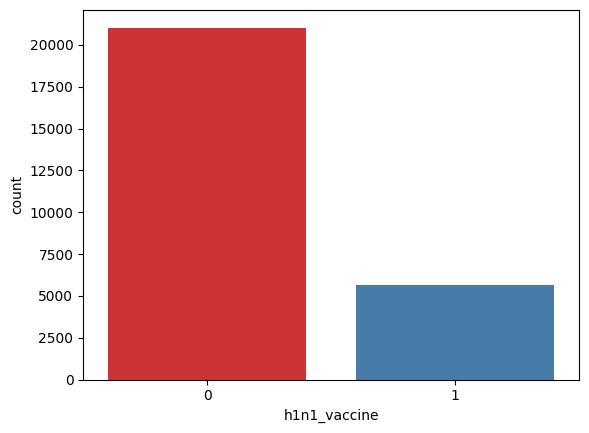

In [3]:
sns.countplot(x=labels_df.h1n1_vaccine, hue=labels_df.h1n1_vaccine, data=labels_df, palette='Set1', legend=False)

As illustrated in the image, the number of individuals who have not received the H1N1 vaccine is approximately four times greater than those who have. Therefore, this indicates that the H1N1 flu vaccine target exhibits a moderately imbalanced class distribution.

### Seasonal vaccine

<Axes: xlabel='seasonal_vaccine', ylabel='count'>

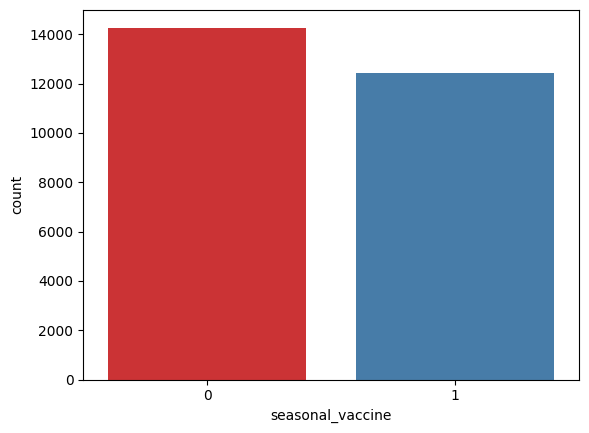

In [4]:
sns.countplot(x=labels_df.seasonal_vaccine, hue=labels_df.seasonal_vaccine, data=labels_df, palette='Set1', legend=False)

In this case, unlike the previous scenario, the difference between the number of individuals who have received the seasonal flu vaccine and those who have not is relatively small. Therefore, we can conclude that the seasonal flu vaccine target has a balanced class distribution.

## Trying some models


This is just a simpler logistic regression to test the model that has been taking as a reference. I am currently  working in the Random Forest

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 6    # Set a random seed for reproducibility!


## Predictions for the test set 

In this case, we will just take into account the numerical data of the test. 

In [6]:
# train_df.dtypes != "object"
numeric_cols = train_df.columns[train_df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


Use another one

In [7]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)


In [8]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1)
)
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'], dtype=object))])),
                ('estimators',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1)))])

## Training and evaluation of the model

In [9]:
X_train, X_eval, y_train, y_eval = train_test_split(
    train_df,
    labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)

In [10]:
%%time

# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline.predict_proba(X_eval)
preds

CPU times: user 124 ms, sys: 189 ms, total: 313 ms
Wall time: 94 ms


[array([[0.70899902, 0.29100098],
        [0.90223299, 0.09776701],
        [0.84460779, 0.15539221],
        ...,
        [0.92338183, 0.07661817],
        [0.89634199, 0.10365801],
        [0.92791534, 0.07208466]]),
 array([[0.52722326, 0.47277674],
        [0.61834416, 0.38165584],
        [0.36997642, 0.63002358],
        ...,
        [0.85935471, 0.14064529],
        [0.77834996, 0.22165004],
        [0.15113572, 0.84886428]])]

 The first array is for h1n1_vaccine, and the second array is for seasonal_vaccine. The two columns for each array are probabilities for class 0 and class 1 respectively. That means we want the second column (index 1) for each of the two arrays. Let's grab those and put them in a data frame.

In [12]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,0.291001,0.472777
16516,0.097767,0.381656
3106,0.155392,0.630024
16981,0.661595,0.857878
19111,0.284395,0.776941


ROC AUC will be used as a metric. In this case, the Receiver Operating Characteristic is a visual tool used to evaluate the performance of a binary classification model. 

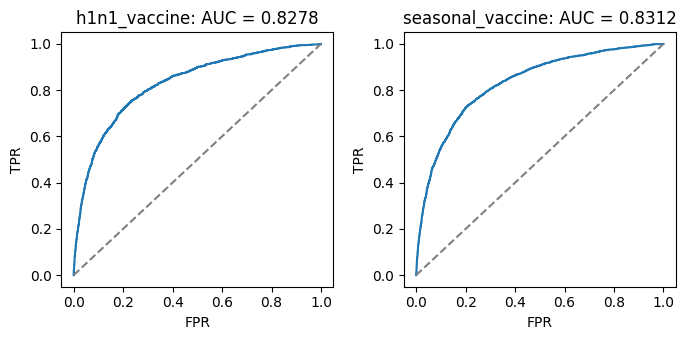

In [ ]:


# Function to draw the plot for the AUC

def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()



In this case, an AUC socre of 0.5 is no better than random and an AUC score of 1.0 is a perfect model. In this case, we will calculate the average between these two AUC values which is the number . Scikit-learn's roc_auc_score does support multilabel, so we can use that directly.


In [14]:
roc_auc_score(y_eval, y_preds)

0.8294727455824251

In [ ]:
# Retrain the model it means re-training te model from scracth using all the available data to improve its performance. 
full_pipeline.fit(train_df, labels_df)
None

## Final result. Upload the result

In [21]:

# the predict_proba method is used for binary or multi-class classification problems when you want to get 
# the probability estimates for each possible class label. 

import numpy as np
train_df =  pd.read_csv("training_set_features.csv", index_col="respondent_id")
test_probas = full_pipeline.predict_proba(train_df)

submission_df = pd.read_csv("submission_format.csv", index_col="respondent_id")
# submission_df.head()
# np.testing.assert_array_equal(train_df.index.values, submission_df.index.values)